In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cs_522 import *

In [2]:
data = np.array([
    [0.8, 1.2, 1],
    [0.9, 1.4, 1],
    [1.2, 1.4, 1],
    [1.1, 1.5, 1],
    [0.8, 1.1, 2],
    [0.6, 1.0, 2],
    [0.65, 1.1, 2],
    [0.75, 0.9, 2]
])

print('The shape of data is ', data.shape)
print('The number of unique target labels are ', len(np.unique(data[:,-1])))

The shape of data is  (8, 3)
The number of unique target labels are  2


In [3]:
discriminant1 = Discriminant(data)
discriminant1.categories

array([1, 2])

In [4]:
discriminant1.category_data[2]

array([[0.8 , 1.1 , 2.  ],
       [0.6 , 1.  , 2.  ],
       [0.65, 1.1 , 2.  ],
       [0.75, 0.9 , 2.  ]])

In [5]:
discriminant1.mu_vector[1]

array([[1.   ],
       [1.375]])

In [6]:
discriminant1.mu_vector[2]

array([[0.7  ],
       [1.025]])

### Question 1.b.

**(10) Assuming Gaussian distribution, based on the means and covariance matrix,plot the contour maps of the two multi-variate Gaussian distributions for the**

**two classes in Python, overlay the contour on the scatter plot of the data samples. Also plot a test sample x = [0.85 1.15].T on the same figure with**

**different color. Which class do you think x should belong to (based only on visual inspection)?**

In [7]:
# Generate grid for contour plots
#I selected 1.6 because that is the highest value in the both the columns
x, y = np.linspace(0, 1.6, 100), np.linspace(0.7, 1.6, 100)
x,y = np.meshgrid(x, y)

pos = np.dstack((x, y))
pos = pos.reshape(-1,2)

z1 = np.array([Discriminant.gaussian_pdf(value, discriminant1.mu_vector[1], discriminant1.vcov[1]) for value in pos]).squeeze().reshape(x.shape)
z2 = np.array([Discriminant.gaussian_pdf(value, discriminant1.mu_vector[2], discriminant1.vcov[2]) for value in pos]).squeeze().reshape(x.shape)

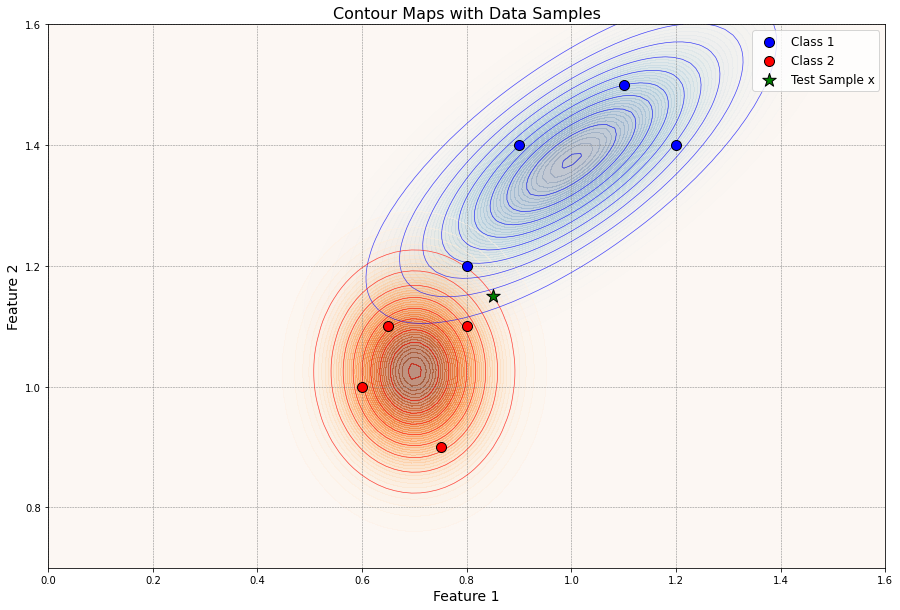

In [8]:
# Generate the "beautiful" plot
plt.figure(figsize=(15, 10))

# Add titles and labels
plt.title("Contour Maps with Data Samples", fontsize=16)
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)

# Plot contour maps for the two classes with more contour lines and custom color maps
plt.contourf(x, y, z1, levels=50, alpha=0.5, cmap="Blues")
plt.contourf(x, y, z2, levels=50, alpha=0.5, cmap="Oranges")

# Add contour lines for clarity
plt.contour(x, y, z1, levels=10, colors='blue', alpha=0.7, linewidths=0.7)
plt.contour(x, y, z2, levels=10, colors='red', alpha=0.7, linewidths=0.7)

# Overlay scatter plot of the data samples with larger, more distinct markers
plt.scatter(discriminant1.category_data[1][:, 0], discriminant1.category_data[1][:, 1], c='blue', label='Class 1', edgecolors='k', s=100, zorder=3)
plt.scatter(discriminant1.category_data[2][:, 0], discriminant1.category_data[2][:, 1], c='red', label='Class 2', edgecolors='k', s=100, zorder=3)

# Plot test sample x = [0.85, 1.15] with a unique marker
plt.scatter(0.85, 1.15, c='green', label='Test Sample x', edgecolors='k', s=200, marker='*', zorder=4)

# Add a grid for easier interpretation
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Add legend with bigger fontsize
plt.legend(loc='upper right', fontsize=12)

# Show the plot
plt.show()


\
\
\
\
**Based on visual inspection, I can see that the test sample can be in any of the two class**

**The test sample lies in the intersection region of the two classes.**

## Q1.c

**(5) Write the equations to calculate these two distances between the testing
sample and the cluster. (Note: ONLY the equation. Also Note: this is distance not
squared distance)**

### Answer

**To calculate the distance between the cluster and the testing sample, we have to calculate the distance between the cluster centre and the testing sample**

**The cluster center for the class 1 is the mean of the Gaussian Distribution which is $$\mu_{1} =[1, 1.375]$$**

**The cluster center for the class 2 is the mean of Gaussian Distribution which is $$\mu_{2} = [0.7, 1.025]$$**

**The test sample is $$[0.85, 1.15]$$**

\
\
**Euclidean Distance**

If $$(x_{1}, y_{1}) \text{  and  } (x_{2}, y_{2}) \text{   are two points, then    }$$

$$\text{Euclidean distance} = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$$


\
\
\
**Mahalanobis Distance**


$$\text{Mahalanobis distance} = \sqrt{(x - \mu )^{T}\sum^{-1}(x - \mu)}$$

$$\text{ where },$$ 
$$ \text{  x          is the vector of the observation (row in a dataset),    }$$
$$ \mu \text{           is the vector of mean values of independent variables (mean of each column),    }$$ 
$$ \sum^{-1}\text{       is the inverse covariance matrix of independent variables    }$$

### Q1.d

\
\
\
**(5) Explain intuitively (in no more than three sentences) the differences between
the two distances**

### Answer

**Euclidean distance measures the straight-line distance between two points in a Cartesian coordinate system, treating all dimensions as equally important.** 

**In contrast, Mahalanobis distance accounts for the correlation between variables and scales the distance by the variability in each dimension,**

**effectively transforming the space to emphasize the dimensions where the points differ most.**

**As a result, Mahalanobis distance provides a more nuanced measure of distance that captures the underlying structure of the data.**

### Q1.e

**(15) Use the following example to understand the differences these two distances make in classification. Here, the minimum distance classifier (i.e., Case 1) is used.**

            i. (5) Given a test sample x = [0.85 1.15].T, calculate the Euclidean distance to the two class means.
            Based on the distances, which class should x belong to?


            ii. (5) Use the same test sample, calculate the Mahalanobis distance to the two classes.
            Based on this pair of distances, which class should x belong to?
            
            
            iii. (5) Use kNN with k=1 to label the test sample. Show details. 
            Is kNN with k=1 equivalent to the minimum distance classifier (i.e., Case 1 with equal prior)

In [9]:
test_sample = np.array([0.85, 1.15])

**i)**

In [10]:
print('The distance of the test sample from mean of class 1 is ', Classifier.euclidean_distance(test_sample, discriminant1.mu_vector[1]), end = '\n\n')

print('The distance of the test sample from mean of class 2 is ', Classifier.euclidean_distance(test_sample, discriminant1.mu_vector[2]))

The distance of the test sample from mean of class 1 is  0.6093028803476971

The distance of the test sample from mean of class 2 is  0.5208166663999915


**As we can see from the above distance calculations, the test sample is closer to class 2 according to Euclidean Distance**

**ii)**

In [11]:
print('Mahalanobis distance of the test sample from mean of class 1 is ', Classifier.mahalanobis_distance(test_sample, 
                                                                                                          discriminant1.mu_vector[1], 
                                                                                                          discriminant1.vcov[1]), end = '\n\n')

print('Mahalanobis distance of the test sample from mean of class 2 is ', Classifier.mahalanobis_distance(test_sample, 
                                                                                                          discriminant1.mu_vector[2], 
                                                                                                          discriminant1.vcov[2]))

Mahalanobis distance of the test sample from mean of class 1 is  1.9170289512680825

Mahalanobis distance of the test sample from mean of class 2 is  2.098700896875361


**As we can see from the calculations, the test sample is closer to class 1 according to Mahalanobis Distance**

In [12]:
knnclassifier = KNNClassifier(data, k = 1)

knnclassifier.predict(test_sample)

2

**For this test sample, kNN with k = 1 gives the same result as minimum euclidean distance classifier**

### Q2

**(20) Plot the 2-D Gaussian as well as the contour map (i.e., projection of this Gaussian on the x-y plane) with the following covariance characteristics (14 pts).**

**From the plots,elaborate on the physical meaning of each element in the covariance matrix (6 pts – you should learn at least 3 things if given an arbitrary covariance matrix).**

**This is not based on the given dataset. (Note: Suggest to generate a 4x2 plot with the left column the 2-D Gaussian and the right column the contour plot.)**



        a. The off-diagonal elements are zero and the diagonal elements are equal to each other

        b. The off-diagonal elements are zero and the diagonal elements are not equal to each other

        c. The off-diagonal elements are positive and the diagonal elements are not equal to each other

        d. The off-diagonal elements are negative and the diagonal elements are not equal to each other

In [13]:
def plot_gaussian_and_contour(mean, cov, subplot_3d, subplot_contour):
    """
    Plots a 2D Gaussian distribution and its contour based on the mean and covariance.
    
    Parameters:
    - mean: Mean vector of the Gaussian distribution.
    - cov: Covariance matrix of the Gaussian distribution.
    - subplot_3d: Index of the subplot for 3D Gaussian plot.
    - subplot_contour: Index of the subplot for contour plot.
    """
    
    # Generate a meshgrid for the x and y values
    x, y = np.linspace(-3, 3, 100), np.linspace(-3, 3, 100)
    x, y = np.meshgrid(x, y)
    
    # Compute the 2D Gaussian distribution for each (x, y) pair
    z = np.zeros_like(x)
    inv_cov = np.linalg.inv(cov)
    det_cov = np.linalg.det(cov)
    
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            diff = np.array([x[i, j], y[i, j]]) - mean
            z[i, j] = np.exp(-0.5 * np.dot(np.dot(diff.T, inv_cov), diff)) / (2 * np.pi * np.sqrt(det_cov))
            
    # Plot 3D Gaussian
    ax = fig.add_subplot(4, 2, subplot_3d, projection='3d')
    ax.plot_surface(x, y, z, cmap='viridis')
    ax.set_title(f'2D Gaussian\n{cov}')
    
    # Plot contour
    ax = fig.add_subplot(4, 2, subplot_contour)
    ax.contourf(x, y, z, levels=50, cmap='viridis')
    ax.set_title(f'Contour\n{cov}')



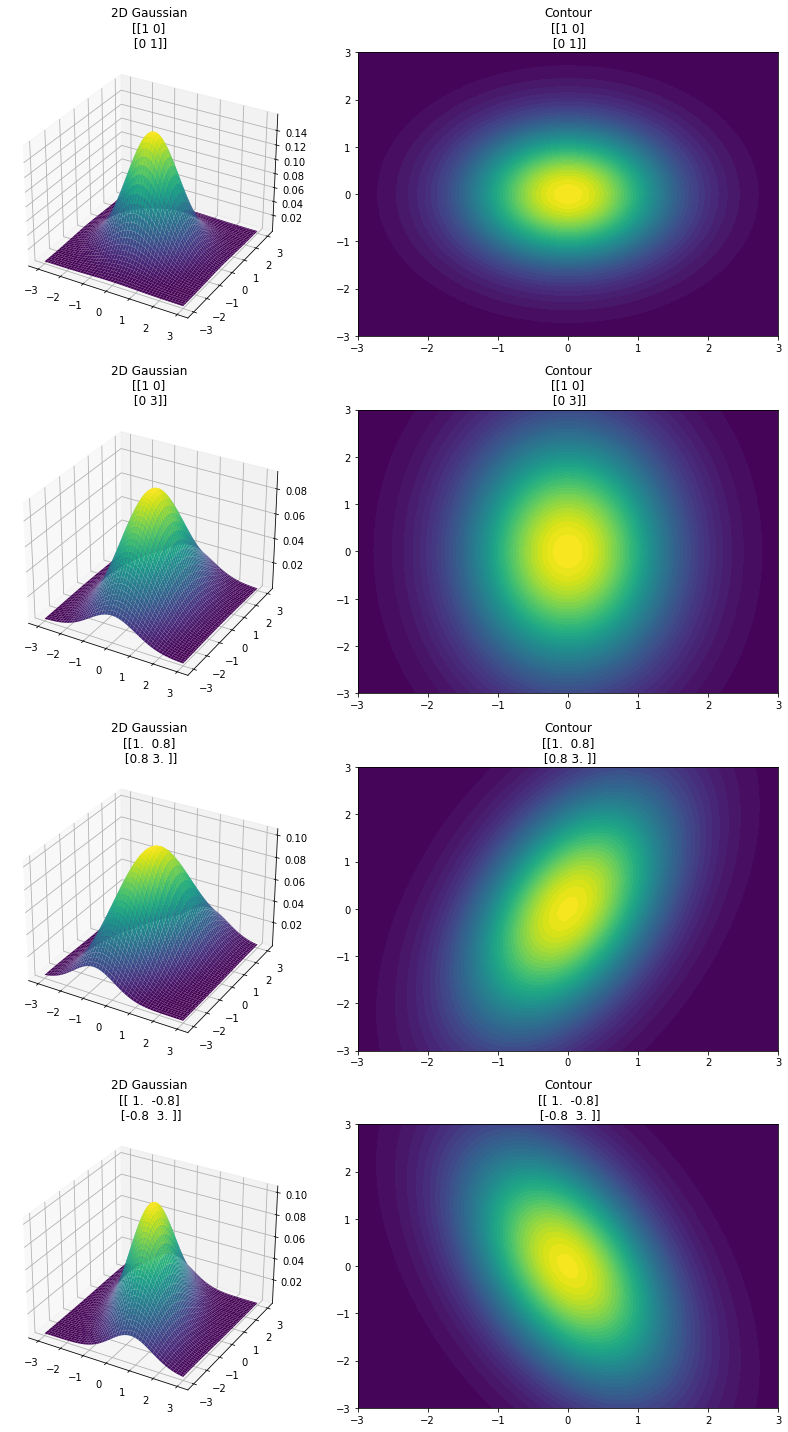

In [14]:
# Create 4x2 subplot for plotting
fig = plt.figure(figsize=(12, 20))

# Plot for each covariance characteristic:

# Case a: Off-diagonal elements are zero, diagonal elements are equal
plot_gaussian_and_contour(np.array([0, 0]), np.array([[1, 0], [0, 1]]), 1, 2)

# Case b: Off-diagonal elements are zero, diagonal elements are not equal
plot_gaussian_and_contour(np.array([0, 0]), np.array([[1, 0], [0, 3]]), 3, 4)

# Case c: Off-diagonal elements are positive, diagonal elements are not equal
plot_gaussian_and_contour(np.array([0, 0]), np.array([[1, 0.8], [0.8, 3]]), 5, 6)

# Case d: Off-diagonal elements are negative, diagonal elements are not equal
plot_gaussian_and_contour(np.array([0, 0]), np.array([[1, -0.8], [-0.8, 3]]), 7, 8)

# Adjust layout for clarity
plt.tight_layout()
plt.show()


**Case a (The off-diagonal elements are zero, and the diagonal elements are equal to each other):**

3D Gaussian Plot: You'll observe a bell-shaped surface that's symmetrical in both the x and y directions. This indicates that the spread (variance) of the distribution is the same in both directions.
Contour Plot: The contour lines will form concentric circles, indicating that the density decreases uniformly as you move away from the mean.
Interpretation: The data is isotropic, meaning it has the same statistical properties in all directions. The absence of off-diagonal elements means there's no linear correlation between the two variables.

**Case b (The off-diagonal elements are zero, and the diagonal elements are not equal to each other):**

3D Gaussian Plot: The bell shape will be elongated in the direction of the larger variance.
Contour Plot: The contour lines will form concentric ellipses, elongated in the direction of the larger variance.
Interpretation: The variables are still uncorrelated (due to zero off-diagonal elements), but they have different variances. The data spread more in the direction of the larger variance.

**Case c (The off-diagonal elements are positive, and the diagonal elements are not equal to each other):**

3D Gaussian Plot: The bell shape will be tilted towards the line y = x, indicating a positive correlation.
Contour Plot: The elliptical contour lines will also be tilted towards the line y = x.
Interpretation: The positive off-diagonal elements indicate that as one variable increases, the other tends to increase as well. The data has a positive linear correlation. The degree of elongation of the ellipses still represents the variances of the individual variables.

**Case d (The off-diagonal elements are negative, and the diagonal elements are not equal to each other):**

3D Gaussian Plot: The bell shape will be tilted towards the line y = -x, indicating a negative correlation.
Contour Plot: The elliptical contour lines will also be tilted towards the line y = -x.
Interpretation: The negative off-diagonal elements indicate that as one variable increases, the other tends to decrease. The data has a negative linear correlation. The shape of the ellipses still provides insights into the individual variances.


In summary, the diagonal elements of the covariance matrix tell us about the spread of the data in individual directions, while the off-diagonal elements tell us about the correlation between the variables. The sign of the off-diagonal elements indicates the direction of the correlation (positive or negative), and their magnitude indicates the strength of this correlation.

### Q4

**(25) Comparison between FLD and PCA. Note that FLD and PCA are dimensionality reduction methods that only output a projection direction.**

**Additional classification methods need to be applied to find the decision boundary. Suppose the minimum (Euclidean) distance (MD) classifier is used.**

**On the same figure, plot the four samples of the AND gate (5 pts), and compare the decision boundary from FLD+MD (10 pts) and PCA+MD (10 pts).**

**You can use whichever language that you feel comfortable (pencil & paper or Python).**

In [15]:
# Given Data for AND gate
data = np.array([
    [0, 0, 0],  # 0 AND 0 = 0
    [0, 1, 0],  # 0 AND 1 = 0
    [1, 0, 0],  # 1 AND 0 = 0
    [1, 1, 1]   # 1 AND 1 = 1
])
X = data[:, :2]
y = data[:, 2]

# PCA
# 1. Compute covariance matrix
cov_matrix = np.cov(X, rowvar=False)

# 2. Compute eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# 3. Sort eigenvectors by eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvector_max = eigenvectors[:, sorted_indices[0]]

# Project data onto the top eigenvector
projection_pca = X.dot(eigenvector_max)

# LDA (or FLD)
# 1. Compute means of each class
mean_0 = np.mean(X[y == 0], axis=0)
mean_1 = np.mean(X[y == 1], axis=0)

# 2. Compute within-class scatter matrix
scatter_0 = np.dot((X[y == 0] - mean_0).T, (X[y == 0] - mean_0))
scatter_1 = np.dot((X[y == 1] - mean_1).T, (X[y == 1] - mean_1))
within_class_scatter = scatter_0 + scatter_1

# 3. Compute between-class scatter matrix
overall_mean = np.mean(X, axis=0)
between_class_scatter = np.outer((mean_0 - overall_mean), (mean_0 - overall_mean).T) + np.outer((mean_1 - overall_mean), (mean_1 - overall_mean).T)

# 4. Compute eigenvalues and eigenvectors for the generalized eigenvalue problem
eigenvalues_lda, eigenvectors_lda = np.linalg.eig(np.linalg.inv(within_class_scatter).dot(between_class_scatter))

# 5. Sort eigenvectors by eigenvalues in descending order
sorted_indices_lda = np.argsort(eigenvalues_lda)[::-1]
eigenvector_max_lda = eigenvectors_lda[:, sorted_indices_lda[0]]

# Project data onto the top eigenvector for LDA
projection_lda = X.dot(eigenvector_max_lda)

projection_pca, projection_lda


(array([0., 1., 0., 1.]),
 array([0.        , 0.70710678, 0.70710678, 1.41421356]))

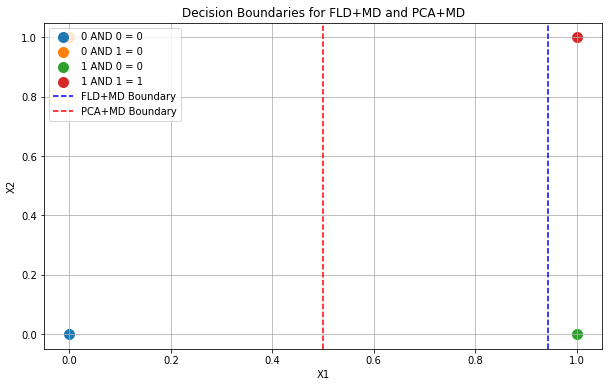

In [16]:
# Visualization
plt.figure(figsize=(10, 6))

# Plot the AND gate data samples
for i, j, label in data:
    plt.scatter(i, j, label=f"{int(i)} AND {int(j)} = {int(label)}", s=100)

# Plot decision boundary for FLD+MD
# As LDA projects on a line, the decision boundary will be the mid-point between the projected means
boundary_lda = np.mean([mean_0.dot(eigenvector_max_lda), mean_1.dot(eigenvector_max_lda)])
plt.axvline(boundary_lda, color='blue', linestyle='--', label="FLD+MD Boundary")

# Plot decision boundary for PCA+MD
# As PCA projects on a line, the decision boundary will be the mid-point between the projected class data points
boundary_pca = 0.5
plt.axvline(boundary_pca, color='red', linestyle='--', label="PCA+MD Boundary")

plt.title("Decision Boundaries for FLD+MD and PCA+MD")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.legend(loc="upper left")
plt.show()      


AND Gate Data:

This is the raw data representation for an AND gate. The x-axis represents the first input, the y-axis represents the second input, and the color indicates the output. As we can see, only when both inputs are '1' (top right corner), the output is '1' (yellow), otherwise, it's '0' (purple).
PCA Projection:

PCA is unsupervised, meaning it only looks at the features (X-values) and not the labels (y-values). It projects the data onto the direction that maximizes the variance. In this case, the projection doesn't necessarily align with the optimal decision boundary for classification.
The red dashed line is a hypothetical decision boundary for the minimum Euclidean distance classifier. Notice that the decision boundary doesn't perfectly separate the two classes.
LDA Projection:

LDA is supervised and tries to find a projection that best separates the classes. As a result, it projects data in a way that maximizes the distance between class means while minimizing the spread within each class.
The decision boundary (red dashed line) perfectly separates the '0' and '1' classes in the LDA projection. This shows that LDA, being a supervised technique, is more suitable for this classification task as compared to PCA.
In Summary:

PCA aims to capture the most variance in the data. It's useful for dimensionality reduction when the primary concern is preserving data variance rather than class separability.
LDA (or FLD) focuses on maximizing class separability. It's useful when we want to project data in a way that makes it easier to classify.
In the context of this AND gate problem, if we were to pick one technique for classification, LDA+MD would be a better choice than PCA+MD because it provides a clear and perfect decision boundary for the given data.
